# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [2]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [4]:
#First, let's look at the head, tail, and types.
#0 is probably ephemeral, 1 evergreen. So label is the target.
su.head()

'''Useless columns likely are boilerplate, compression_ratio, frameBased, frameTagRatio, spelling_errors_ratio'''

'Useless columns likely are boilerplate, compression_ratio, frameBased, frameTagRatio, spelling_errors_ratio'

In [5]:
su.tail()

url  urlid  \
7390  http://techcrunch.com/2010/09/08/kno-raises-46...   8958   
7391  http://www.uncoached.com/category/why-i-miss-c...   8895   
7392  http://eatthis.menshealth.com/slide/sweet-pota...   1191   
7393                          http://naturallyella.com/   5612   
7394  http://sportsillustrated.cnn.com/2011_swimsuit...     90   

                                            boilerplate    alchemy_category  \
7390  {"title":"Kno Raises 46 Million More To Build ...   computer_internet   
7391  {"title":"Why I Miss College ","body":"Mar 30 ...    culture_politics   
7392  {"title":"Sweet Potatoes Eat This Not That  i'...          recreation   
7393  {"title":"Naturally Ella ","body":" ","url":"n...  arts_entertainment   
7394  {"title":"Esti Ginzburg Swimsuit by Letarte by...                   ?   

     alchemy_category_score  avglinksize  commonlinkratio_1  \
7390               0.651067     3.010526           0.474747   
7391                0.14192     2.208054           0.483333   
7392               0.196273     2.000000           0.315789   
7393               0.617876     1.026316           0.210526   
7394                      ?     1.158209           0.505917   

      commonlinkratio_2  commonlinkratio_3  commonlinkratio_4  ...    is_news  \
7390           0.222222           0.191919           0.191919  ...          1   
7391           0.246667           0.036667           0.026667  ...          1   
7392           0.171053           0.105263           0.052632  ...          ?   
7393           0.052632           0.000000           0.000000  ...          1   
7394           0.428994           0.023669           0.000000  ...          ?   

      lengthyLinkDomain  linkwordscore  news_front_page  \
7390                  1             38                0   
7391                  1             34                0   
7392                  1             43                0   
7393                  0             37                1   
7394                  0             78                ?   

      non_markup_alphanum_characters  numberOfLinks  numwords_in_url  \
7390                            2219             99               11   
7391                            5672            300                4   
7392                             848             76                5   
7393                             386             38                0   
7394                             515            338                4   

     parametrizedLinkRatio  spelling_errors_ratio  label  
7390              0.040404               0.071429      0  
7391              0.020000               0.109453      0  
7392              0.434211               0.117647      1  
7393              0.026316               0.333333      1  
7394              0.005917               0.134146      0  

[5 rows x 27 columns]

In [29]:
su.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

In [3]:
#dropping some columns
su.drop(['boilerplate', 'url'], axis = 1, inplace = True )

In [31]:
#checking results.
su.dtypes

urlid                               int64
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                     int64
parametrizedLinkRatio             float64
spelling_errors_ratio             

In [32]:
#Any nulls? no?
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 25 columns):
urlid                             7395 non-null int64
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_ratio                       7395 non-null float64
is_news                           7395 non-null object
length

In [4]:
#Any cleaning?
su.alchemy_category_score.value_counts() #2342 ?s...

su.alchemy_category_score = pd.to_numeric(su.alchemy_category_score, errors = 'coerce')
su.alchemy_category_score.isnull().value_counts()
su = su.dropna(axis = 0)

In [45]:
su.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 0 to 7393
Data columns (total 25 columns):
urlid                             5053 non-null int64
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       5053 non-null float64
commonlinkratio_1                 5053 non-null float64
commonlinkratio_2                 5053 non-null float64
commonlinkratio_3                 5053 non-null float64
commonlinkratio_4                 5053 non-null float64
compression_ratio                 5053 non-null float64
embed_ratio                       5053 non-null float64
framebased                        5053 non-null int64
frameTagRatio                     5053 non-null float64
hasDomainLink                     5053 non-null int64
html_ratio                        5053 non-null float64
image_ratio                       5053 non-null float64
is_news                           5053 non-null object
lengt

In [6]:
#checking my other categorical variables for ?s...
print su.news_front_page.value_counts() #229 ?s. Likely not front page... Likely not even news. So 0.
su.news_front_page = pd.to_numeric(su.news_front_page, errors = 'coerce')
su.news_front_page.fillna(0, inplace = True)

0.0    4823
1.0     230
Name: news_front_page, dtype: int64


In [7]:
#Confirming that nulls are now zero for news front page...
su.news_front_page.value_counts()

0.0    4823
1.0     230
Name: news_front_page, dtype: int64

In [8]:
#Checking is_news. ?s are probably zero...
print su.is_news.value_counts()
su.is_news = pd.to_numeric(su.is_news, errors = coerce)
print su.is_news.isnull().value_counts()
su.is_news.fillna(0, inplace = True)
print su.is_news.isnull().value_counts()
print su.is_news.value_counts() #cleaned..

1    3566
?    1487
Name: is_news, dtype: int64
False    3566
True     1487
Name: is_news, dtype: int64
False    5053
Name: is_news, dtype: int64
1.0    3566
0.0    1487
Name: is_news, dtype: int64


In [9]:
su.alchemy_category.value_counts()

#Looks like this one is fine. Unknown at six is probably acceptable.

su.shape

(5053, 25)

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [72]:
import statsmodels.formula.api as smf
formula = 'label ~ avglinksize + embed_ratio + html_ratio + image_ratio + lengthyLinkDomain + hasDomainLink + frameTagRatio + linkwordscore + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + commonlinkratio_1 + commonlinkratio_3 + commonlinkratio_4 - 1'
logreg = smf.logit(formula, data = su)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.656420
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5039
Method:                           MLE   Df Model:                           13
Date:                Wed, 18 May 2016   Pseudo R-squ.:                 0.05205
Time:                        16:55:38   Log-Likelihood:                -3316.9
converged:                       True   LL-Null:                       -3499.0
                                        LLR p-value:                 7.809e-70
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
avglinksize                        0.0027      0.003      0.881     

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [76]:
import statsmodels.formula.api as smf
formula = 'label ~ C(alchemy_category) + C(is_news) + avglinksize + embed_ratio + html_ratio + image_ratio + C(lengthyLinkDomain) + C(hasDomainLink) + frameTagRatio + linkwordscore + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + commonlinkratio_1 + commonlinkratio_3 + commonlinkratio_4 - 1'
logreg = smf.logit(formula, data = su)
logreg_results = logreg.fit()
print logreg_results.summary()

         Current function value: 0.598566
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5025
Method:                           MLE   Df Model:                           27
Date:                Wed, 18 May 2016   Pseudo R-squ.:                  0.1356
Time:                        16:59:42   Log-Likelihood:                -3024.6
converged:                      False   LL-Null:                       -3499.0
                                        LLR p-value:                1.502e-182
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
C(alchemy_category)[arts_entertainment]     0.2086      0.231      0.901      0.368   

//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Pivoting to sklearn

Okay, this is not doing well in statsmodels...

__Switching to sklearn and following the below process__

    1) Scale the numeric values.
    2) Split into train/test
    3) Look up how to do n-folds cross validation for Logistic, do this on the training set.
    4) Predict the test set.
    5) Get the scores for the training set and see the accuracy score for the test set.




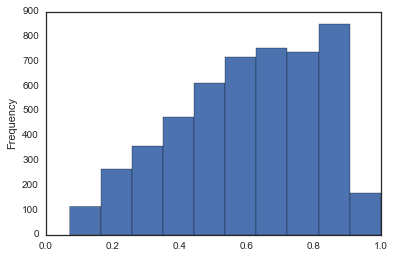

In [10]:
su.alchemy_category_score.plot(kind = 'hist')


In [81]:
su.columns

Index([u'urlid', u'alchemy_category', u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'framebased', u'frameTagRatio', u'hasDomainLink',
       u'html_ratio', u'image_ratio', u'is_news', u'lengthyLinkDomain',
       u'linkwordscore', u'news_front_page', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio', u'label'],
      dtype='object')

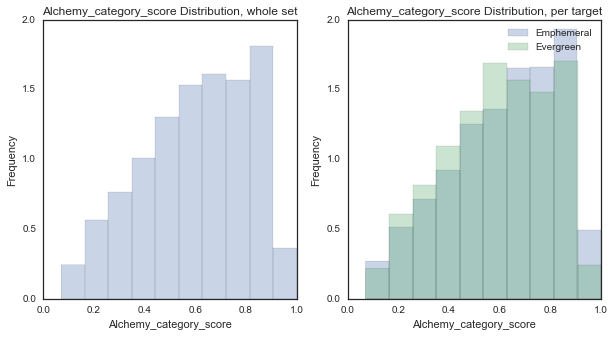

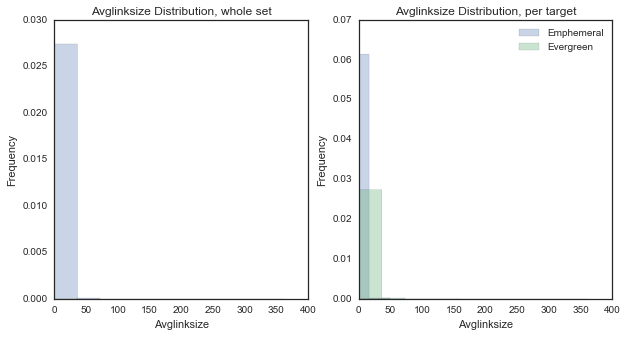

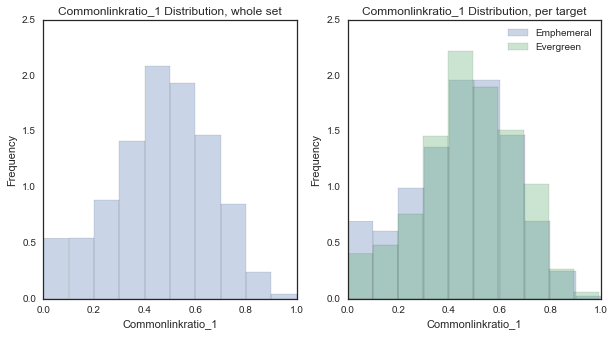

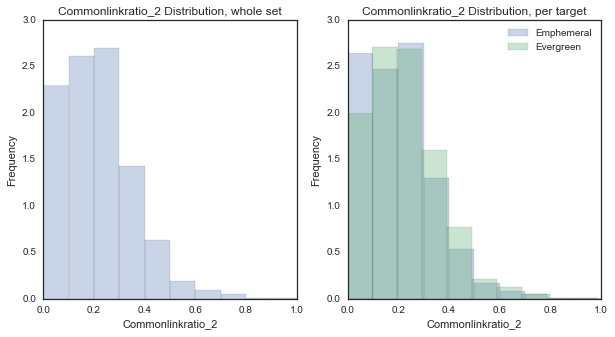

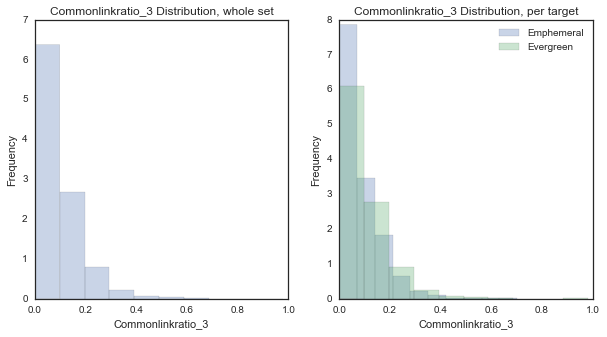

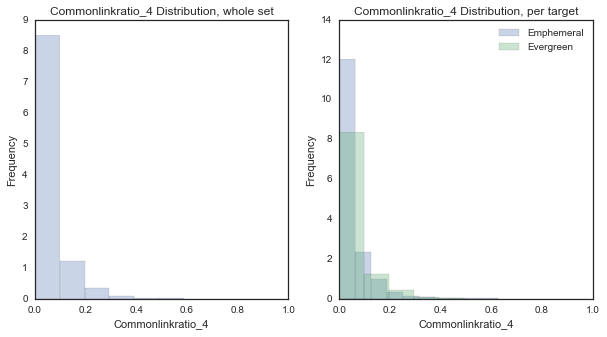

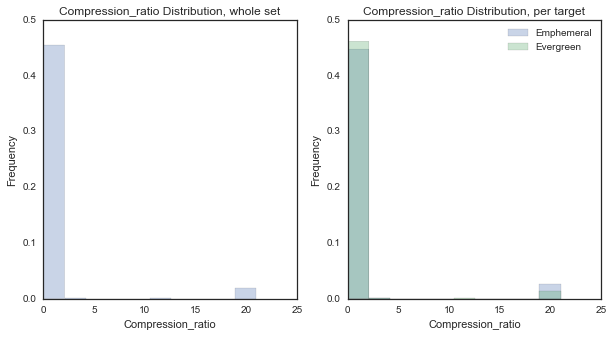

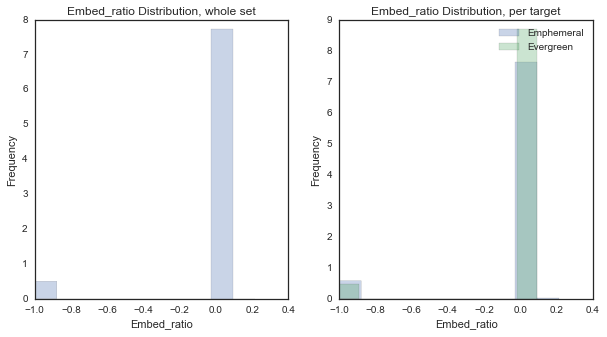

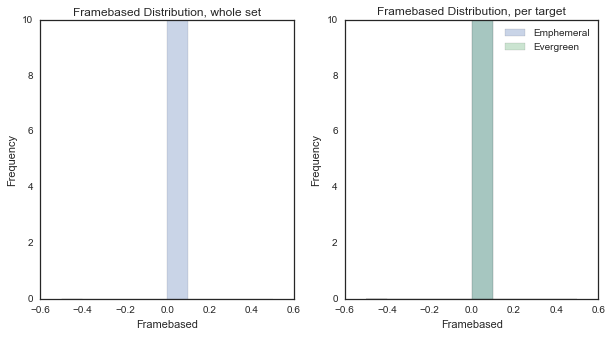

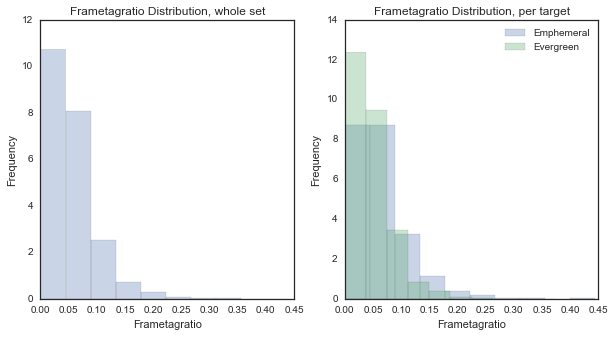

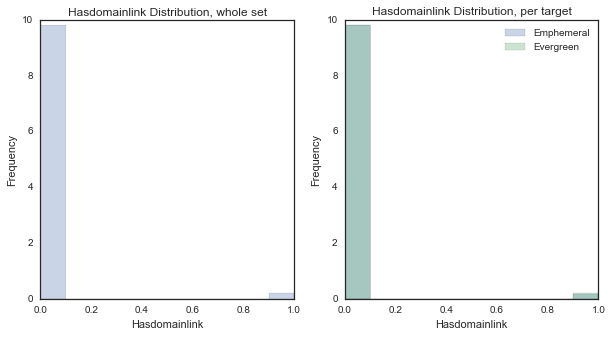

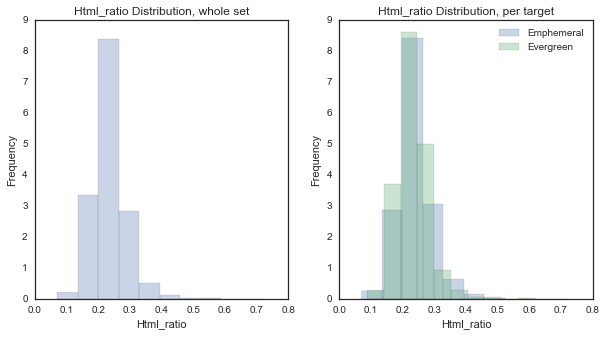

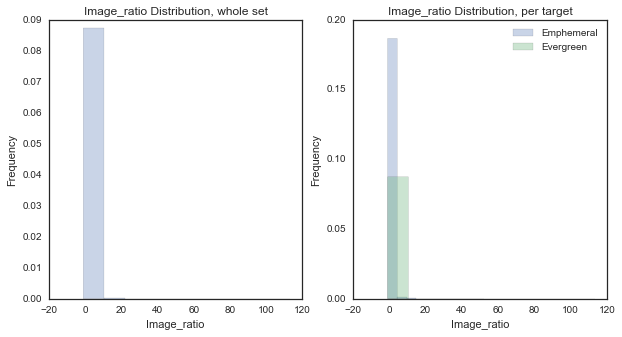

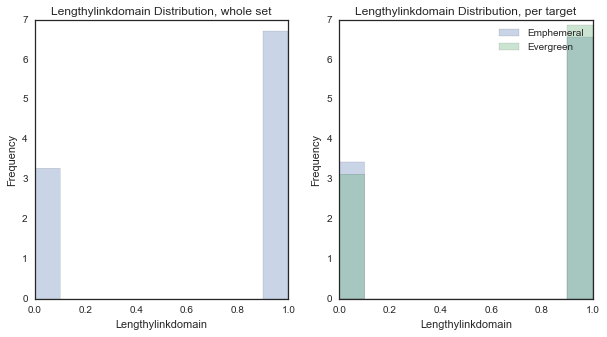

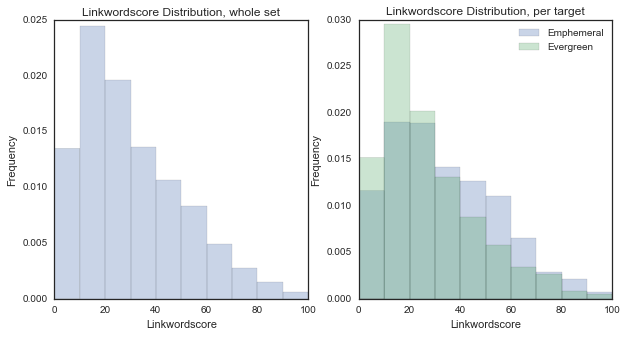

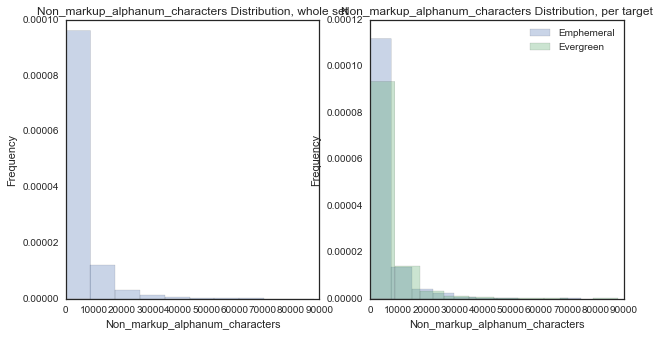

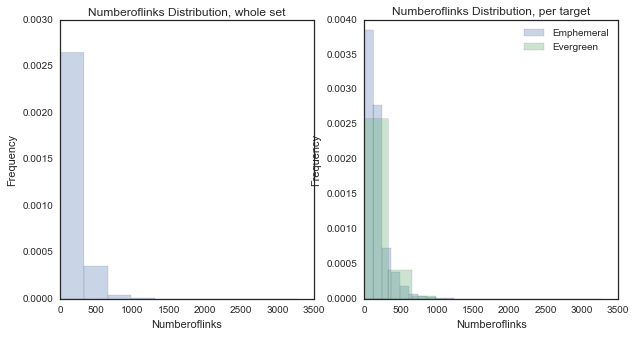

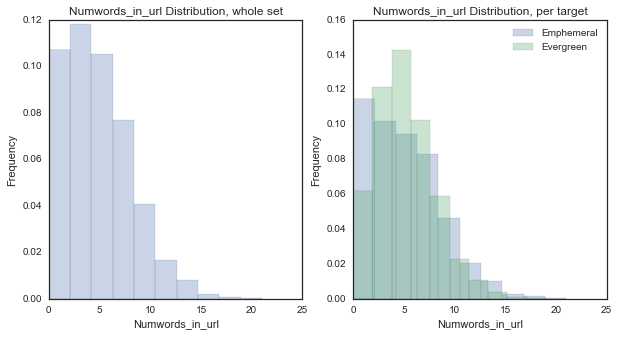

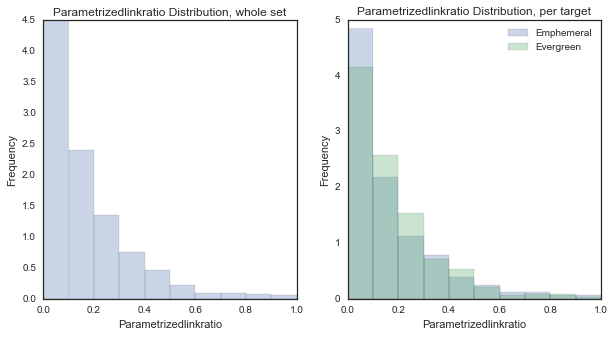

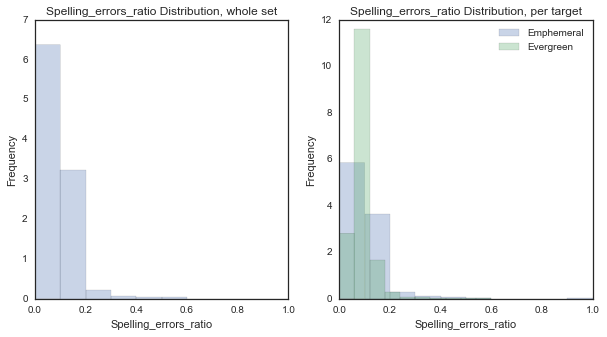

In [11]:
def do_plot_hist(feat):
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    su[feat].plot(kind='hist', alpha = 0.3, normed = True)
    plt.xlabel(feat.capitalize())
    plt.title(feat.capitalize() + ' Distribution, whole set')

    plt.subplot(122)
    su[su.label == 0][feat].plot(kind='hist', alpha = 0.3, normed = True)
    su[su.label == 1][feat].plot(kind='hist', alpha = 0.3, normed = True)
    plt.legend(['Emphemeral', 'Evergreen'])
    plt.xlabel(feat.capitalize())
    plt.title(feat.capitalize() + ' Distribution, per target')

for c in [u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'framebased', u'frameTagRatio', u'hasDomainLink',
       u'html_ratio', u'image_ratio', u'lengthyLinkDomain',
       u'linkwordscore', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio']:
    do_plot_hist(c)

Looking at the above, I am seeing how based on the scale of certain variables like Numberoflinks, it could be worthwhile to scale...

In [12]:
categorical = ['hasDomainLink', 'is_news', 'news_front_page']

#Note, alchemy category is categorical. The others are binary variables.

#Don't use framebased - no change at all.

#Normalizing my numerical variables
#Train test split.
numerical_cols = [u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'frameTagRatio',
       u'html_ratio', u'image_ratio', u'lengthyLinkDomain',
       u'linkwordscore', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio']
X = su[numerical_cols]

from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print X_norm.shape #Looks good so far...
print su.shape


(5053, 18)
(5053, 25)


In [13]:
#Convert alchemy_category into dummies...
dummies = pd.get_dummies(su.alchemy_category, drop_first = True)
dummies.shape

#Join the categoricals together.

cats = dummies.join(su[categorical])
cats.shape
cats.head()

business  computer_internet  culture_politics  gaming  health  law_crime  \
0       1.0                0.0               0.0     0.0     0.0        0.0   
1       0.0                0.0               0.0     0.0     0.0        0.0   
2       0.0                0.0               0.0     0.0     1.0        0.0   
3       0.0                0.0               0.0     0.0     1.0        0.0   
4       0.0                0.0               0.0     0.0     0.0        0.0   

   recreation  religion  science_technology  sports  unknown  weather  \
0         0.0       0.0                 0.0     0.0      0.0      0.0   
1         1.0       0.0                 0.0     0.0      0.0      0.0   
2         0.0       0.0                 0.0     0.0      0.0      0.0   
3         0.0       0.0                 0.0     0.0      0.0      0.0   
4         0.0       0.0                 0.0     1.0      0.0      0.0   

   hasDomainLink  is_news  news_front_page  
0              0      1.0              0.0  
1              0      1.0              0.0  
2              0      1.0              0.0  
3              0      1.0              0.0  
4              0      1.0              0.0

In [14]:
#Combining my normalized X and my categorical data.


X_norm_df = pd.DataFrame(X_norm, index = cats.index, columns = numerical_cols)
X_norm_combined = X_norm_df.join(cats)
X_norm_combined.shape

(5053, 33)

In [15]:
#Train Test Split
y = su.label

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm_combined,y, test_size = .2, random_state = 31) #why not use my age as a random state.

In [16]:
from sklearn.linear_model import LogisticRegressionCV

#Default is L2 penalty. Going to set my library to liblinear
logregcv = LogisticRegressionCV(cv = 10, solver = 'liblinear')

## Fitting a Logistic Model with Cross Validation, L2 (Ridge), 10 Folds, only on numerical data.

In [17]:
#Going to first run a Logistic on the numerical only....
logregcv_l2_num = LogisticRegressionCV(Cs = [0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04], cv = 10, solver = 'liblinear', random_state = 31)
logregcv_l2_num.fit(X_train[numerical_cols],y_train)
y_pred_l2_num = logregcv_l2_num.predict(X_test[numerical_cols])

#scores from CV
print "The scores from the CV are:"
print logregcv_l2_num.scores_.values()
print "The average of the scores from 10 folds over 10 Cs were:", np.mean(logregcv_l2_num.scores_.values())
print ""
print "The C's used were:"
print logregcv_l2_num.Cs_
print ""
print "The best C's:"
print logregcv_l2_num.C_

#accuracy score
from sklearn.metrics import accuracy_score
print ""
print "The accuracy score of this model on numerical data only is:", accuracy_score(y_test, y_pred_l2_num)

coefficients = pd.DataFrame(logregcv_l2_num.coef_, columns = numerical_cols)
print "The coefficients for our model with L2 regularization for our Logistic Regression are below."
coefficients

The scores from the CV are:
[array([[ 0.63950617,  0.6345679 ,  0.63209877,  0.62962963,  0.62469136,
         0.62469136,  0.62222222,  0.62222222,  0.62222222,  0.63950617,
         0.62469136,  0.63703704,  0.62962963,  0.62222222,  0.62222222,
         0.62222222,  0.62222222,  0.62222222,  0.62222222],
       [ 0.62716049,  0.62962963,  0.62962963,  0.62469136,  0.61728395,
         0.61481481,  0.61481481,  0.61481481,  0.61728395,  0.60740741,
         0.61975309,  0.62716049,  0.62716049,  0.61481481,  0.61728395,
         0.61728395,  0.61728395,  0.61728395,  0.61728395],
       [ 0.62376238,  0.62623762,  0.62376238,  0.62376238,  0.62376238,
         0.62871287,  0.62871287,  0.62871287,  0.63118812,  0.5990099 ,
         0.61881188,  0.62871287,  0.62376238,  0.62871287,  0.63118812,
         0.63118812,  0.63118812,  0.63118812,  0.63118812],
       [ 0.59405941,  0.59405941,  0.59653465,  0.59653465,  0.59653465,
         0.59653465,  0.59405941,  0.59405941,  0.59405941

alchemy_category_score  avglinksize  commonlinkratio_1  commonlinkratio_2  \
0               -0.176558      0.02526           0.121655          -0.028927   

   commonlinkratio_3  commonlinkratio_4  compression_ratio  embed_ratio  \
0           0.280325          -0.126535           0.022035    -0.087147   

   frameTagRatio  html_ratio  image_ratio  lengthyLinkDomain  linkwordscore  \
0      -0.336549    0.000011    -0.003868           0.034859      -0.471915   

   non_markup_alphanum_characters  numberOfLinks  numwords_in_url  \
0                       -0.163013       0.115245         -0.10185   

   parametrizedLinkRatio  spelling_errors_ratio  
0              -0.031959              -0.211482

In [19]:
#Baseline for model to beat. Essentially, what if your predictor was always "evergreen"?
#All of dataset.
print y.value_counts()/y.count()
print "Baseline if using all of the data is 51.8%."

#If using training only?
print y_train.value_counts()/y_train.count()
print "Baseline if using all of the data is 51.7%."

1    0.518504
0    0.481496
Name: label, dtype: float64
Baseline if using all of the data is 51.8%.
1    0.517071
0    0.482929
Name: label, dtype: float64
Baseline if using all of the data is 51.7%.


### Initial thoughts:

1) The average R_squared for the training data fit is .63, which is so much better than statsmodel without CV (0.05ish). My hypothesis is because I did not run statsmodels logistic regression on normalized numeric data.

2) The model is better than a coinflip, and better than the baseline of 51.7% for the training data if saying evergreen all the time...

### Fitting a Logistic Regression CV with 10 folds, L2 penalty, on the whole dataset (categorical and the numerical binary vars)

So now we are including alchemy_category, is_news, hasDomainLink, and the front page news variable.

In [20]:
#All of data....
logregcv_l2_whole = LogisticRegressionCV(Cs = [0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04], cv = 10, solver = 'liblinear', random_state = 31)
logregcv_l2_whole.fit(X_train,y_train)
y_pred_l2_whole = logregcv_l2_whole.predict(X_test)

#scores from CV
print "The scores from the CV are:"
print logregcv_l2_whole.scores_.values()
print "The average of the scores from 10 folds over 10 Cs were:", np.mean(logregcv_l2_whole.scores_.values())
print ""
print "The C's used were:"
print logregcv_l2_whole.Cs_
print "The Best C is:"
print logregcv_l2_whole.C_

#accuracy score
from sklearn.metrics import accuracy_score
print ""
print "The accuracy score of this model on all data is:", accuracy_score(y_test, y_pred_l2_whole)

coefficients = pd.DataFrame(logregcv_l2_whole.coef_, columns = X_train.columns)
print "The coefficients for our model with Ridge regularization for our Logistic Regression are below."
coefficients

The scores from the CV are:
[array([[ 0.69382716,  0.70864198,  0.70864198,  0.71851852,  0.71358025,
         0.71604938,  0.71111111,  0.71358025,  0.71358025,  0.64938272,
         0.65679012,  0.68148148,  0.71358025,  0.71358025,  0.71358025,
         0.71358025,  0.71358025,  0.71358025,  0.71358025],
       [ 0.67160494,  0.67407407,  0.67901235,  0.68641975,  0.67901235,
         0.67407407,  0.67160494,  0.67407407,  0.67654321,  0.62469136,
         0.64444444,  0.65925926,  0.68395062,  0.67654321,  0.6691358 ,
         0.6691358 ,  0.6691358 ,  0.6691358 ,  0.6691358 ],
       [ 0.68316832,  0.68811881,  0.68811881,  0.68564356,  0.68069307,
         0.68069307,  0.68069307,  0.68069307,  0.68069307,  0.61633663,
         0.64851485,  0.66089109,  0.68564356,  0.68316832,  0.68316832,
         0.68316832,  0.68316832,  0.68316832,  0.68316832],
       [ 0.68811881,  0.71287129,  0.70049505,  0.70544554,  0.7029703 ,
         0.70792079,  0.70792079,  0.71287129,  0.70792079

alchemy_category_score  avglinksize  commonlinkratio_1  commonlinkratio_2  \
0               -0.109037     0.025696            0.08352           0.005997   

   commonlinkratio_3  commonlinkratio_4  compression_ratio  embed_ratio  \
0           0.188181          -0.064073            0.01839    -0.064696   

   frameTagRatio  html_ratio       ...         law_crime  recreation  \
0      -0.298564    0.009882       ...         -0.006577    0.714639   

   religion  science_technology    sports   unknown   weather  hasDomainLink  \
0 -0.009802           -0.030741 -0.547079 -0.007693 -0.001378      -0.027421   

    is_news  news_front_page  
0  0.035665         -0.22638  

[1 rows x 33 columns]

### Fitting a Logistic Regression CV with 10 folds, L1 penalty, on the whole dataset (categorical and the numerical binary vars)

So now we are including alchemy_category, is_news, hasDomainLink, and the front page news variable.

In [21]:
#All of data....
logregcv_l1_whole = LogisticRegressionCV(Cs = [0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04], penalty = 'l1', cv = 10, solver = 'liblinear', random_state = 31)
logregcv_l1_whole.fit(X_train,y_train)
y_pred_l1_whole = logregcv_l1_whole.predict(X_test)

#scores from CV
print "The scores from the CV are:"
print logregcv_l1_whole.scores_.values()
print "The average of the scores from 10 folds over 10 Cs were:", np.mean(logregcv_l1_whole.scores_.values())
print ""
print "The C's used were:"
print logregcv_l1_whole.Cs_
print "The best C is:"
print logregcv_l1_whole.C_

#accuracy score
from sklearn.metrics import accuracy_score
print ""
print "The accuracy score of this model on all data is:", accuracy_score(y_test, y_pred_l1_whole)

coefficients = pd.DataFrame(logregcv_l1_whole.coef_, columns = X_train.columns)
print "The coefficients for our model with Ridge regularization for our Logistic Regression are below."
coefficients

The scores from the CV are:
[array([[ 0.63703704,  0.68395062,  0.70123457,  0.71111111,  0.7037037 ,
         0.70123457,  0.7037037 ,  0.71111111,  0.70864198,  0.48395062,
         0.48395062,  0.59259259,  0.70864198,  0.70617284,  0.71358025,
         0.71358025,  0.71358025,  0.71358025,  0.71358025],
       [ 0.62222222,  0.6617284 ,  0.6617284 ,  0.6691358 ,  0.67407407,
         0.68395062,  0.67407407,  0.67407407,  0.6691358 ,  0.48395062,
         0.48395062,  0.62222222,  0.67407407,  0.67654321,  0.67654321,
         0.6691358 ,  0.6691358 ,  0.6691358 ,  0.6691358 ],
       [ 0.63613861,  0.67079208,  0.66584158,  0.68811881,  0.68811881,
         0.68811881,  0.67821782,  0.67574257,  0.68069307,  0.48267327,
         0.48267327,  0.61138614,  0.68564356,  0.68069307,  0.68316832,
         0.68316832,  0.68316832,  0.68316832,  0.68316832],
       [ 0.62128713,  0.66831683,  0.69554455,  0.6980198 ,  0.70049505,
         0.70049505,  0.70544554,  0.7029703 ,  0.70792079

alchemy_category_score  avglinksize  commonlinkratio_1  commonlinkratio_2  \
0               -0.086831     0.014528           0.078552                0.0   

   commonlinkratio_3  commonlinkratio_4  compression_ratio  embed_ratio  \
0           0.150291          -0.013239           0.003635    -0.060961   

   frameTagRatio  html_ratio       ...         law_crime  recreation  \
0      -0.299227         0.0       ...               0.0    0.961719   

   religion  science_technology    sports  unknown  weather  hasDomainLink  \
0       0.0                 0.0 -0.749676      0.0      0.0            0.0   

    is_news  news_front_page  
0  0.009187        -0.265865  

[1 rows x 33 columns]

### Initial Thoughts on using all of the numerical and categorical data.

1) What I wish is that I could see the p-values to see what should be tossed out.

2) The average fit score on the training data is five percentage points better than with numerical only. So categorical adds some value.

3) The accuracy score on the test data is 0.69, which is better than numerical only and better than the baseline.

## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

I am not sure what normalizing the categorical columns entails...

However, the numerical data was normalized above with StandardScaler()

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [ ]:
#Note - if I used LogisticRegressionCV above and it incorporated a variety of C's, is it the equivalent to GridSearchCV?


### Gridsearch on the Logistic using Ridge regression, but liblinear library. 

In [22]:
#Just using the whole training set.
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression

logreg_ridge = LogisticRegression(penalty = 'l2', solver = 'liblinear', random_state = 31)

logreg_ridge_grid = GridSearchCV(logreg_ridge,
                   param_grid = {"C":[0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04]}, cv = 10) #just using this...

logreg_ridge_grid.fit(X_train, y_train)
print "The best C for Ridge is:"
print logreg_ridge_grid.best_params_
print "The best score for Ridge with that C was:"
print logreg_ridge_grid.best_score_



The best C for Ridge is:
{'C': 0.02}
The best score for Ridge with that C was:
0.695200395844


### Gridsearch on Logistic with Lasso Regression.

In [23]:
#Just using the whole training set.
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression

logreg_lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 31)

logreg_lasso_grid = GridSearchCV(logreg_lasso,
                   param_grid = {"C":[0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04]}, cv = 10) #just using this...

logreg_lasso_grid.fit(X_train, y_train)
print "The best C for Lasso is:"
print logreg_lasso_grid.best_params_
print "The best score for Lasso with that C was:"
print logreg_lasso_grid.best_score_
logreg_lasso_grid.best_estimator_



The best C for Lasso is:
{'C': 0.1}
The best score for Lasso with that C was:
0.691489361702


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=31, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Thoughts

1) GridSearchCV and LogisticRegressionCV produce the same results when given the same random_state and C's to iterate on. So they are the same when GridSearchCV is using LogisticRegression as its estimator...



### Building a Lasso Logistic with best_params

Why? Because there are so many variables.

In [24]:
logreg_lasso = logreg_lasso_grid.best_estimator_
logreg_lasso.fit(X_train, y_train)
y_pred_lasso = logreg_lasso.predict(X_test)

print "Score for fit for Lasso is:", logreg_lasso.score(X_train,y_train)
print ""
print "Accuracy Score is:", accuracy_score(y_test, y_pred_lasso)

coefficients_lasso_final = pd.DataFrame(logreg_lasso.coef_, columns = X_train.columns)
coefficients_lasso_final



Score for fit for Lasso is: 0.695695200396

Accuracy Score is: 0.692383778437


alchemy_category_score  avglinksize  commonlinkratio_1  commonlinkratio_2  \
0               -0.086831     0.014528           0.078552                0.0   

   commonlinkratio_3  commonlinkratio_4  compression_ratio  embed_ratio  \
0           0.150291          -0.013239           0.003635    -0.060961   

   frameTagRatio  html_ratio       ...         law_crime  recreation  \
0      -0.299227         0.0       ...               0.0    0.961719   

   religion  science_technology    sports  unknown  weather  hasDomainLink  \
0       0.0                 0.0 -0.749676      0.0      0.0            0.0   

    is_news  news_front_page  
0  0.009187        -0.265865  

[1 rows x 33 columns]

In [25]:
#What are dropped features?
dropped_lasso = []
for i in coefficients_lasso_final.columns:
    if coefficients_lasso_final[i][0] == 0:
        dropped_lasso.append(i)
        
print dropped_lasso

[u'commonlinkratio_2', u'html_ratio', u'image_ratio', 'gaming', 'law_crime', 'religion', 'science_technology', 'unknown', 'weather', 'hasDomainLink']


In [26]:
logreg_ridge = logreg_ridge_grid.best_estimator_

logreg_ridge.fit(X_train, y_train)
y_pred_ridge = logreg_ridge.predict(X_test)

print "Score for fit for Ridge is:", logreg_ridge.score(X_train,y_train)
print ""
print "Accuracy Score is:", accuracy_score(y_test, y_pred_ridge)

coefficients_ridge_final = pd.DataFrame(logreg_ridge.coef_, columns = X_train.columns)
coefficients_ridge_final


Score for fit for Ridge is: 0.698416625433

Accuracy Score is: 0.695351137488


alchemy_category_score  avglinksize  commonlinkratio_1  commonlinkratio_2  \
0               -0.109037     0.025696            0.08352           0.005997   

   commonlinkratio_3  commonlinkratio_4  compression_ratio  embed_ratio  \
0           0.188181          -0.064073            0.01839    -0.064696   

   frameTagRatio  html_ratio       ...         law_crime  recreation  \
0      -0.298564    0.009882       ...         -0.006577    0.714639   

   religion  science_technology    sports   unknown   weather  hasDomainLink  \
0 -0.009802           -0.030741 -0.547079 -0.007693 -0.001378      -0.027421   

    is_news  news_front_page  
0  0.035665         -0.22638  

[1 rows x 33 columns]

### Crossvalidation was done above both with LogisticRegressionCV and GridSearchCV. 

1) The coefficients for the best estimators for the two are all above.

2) I am not sure if it is a matter of preference to use the L1 output or L2 output. Both models are included, and both do reasonably well in increasing the predictiveness of whether a page is evergreen or not. I would recommend the L1 model purely because it may be computationally more efficient since there are fewer ultimate parameters. If this is not a consideration, then the L2 model may be better as it accomodates outliers better.



## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn_params = {"n_neighbors" : range(1,51)}

knn_grid = GridSearchCV(knn, param_grid = knn_params)

knn_grid.fit(X_train, y_train)
print "The best score with KNN was:", knn_grid.best_score_
print "The number of neighbors was:", knn_grid.best_params_
print knn_grid.best_estimator_

The best score with KNN was: 0.673428995547
The number of neighbors was: {'n_neighbors': 14}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')


In [28]:
#Taking the best estimator and predicting.

#Double Checking by first using the built-in predict method for gridsearchcv.
y_1 = knn_grid.predict(X_test)
print "The accuracy score for KNN of 14 Neighbors using GridSearchCV's built-in predict method is:", accuracy_score(y_test, y_1)

#Second, using the best_estimator output from gridsearchcv to build a KNN model.
knn2 = knn_grid.best_estimator_
knn2.fit(X_train, y_train)
y_2 = knn2.predict(X_test)
print ""
print "The accuracy score for KNN using best_estimator_ from gridsearchcv to fit the training data and then predict is:", accuracy_score(y_test, y_2)
print ""
print "The scores match - they likely both work the same."

The accuracy score for KNN of 14 Neighbors using GridSearchCV's built-in predict method is: 0.700296735905

The accuracy score for KNN using best_estimator_ from gridsearchcv to fit the training data and then predict is: 0.700296735905

The scores match - they likely both work the same.


## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

In [29]:
#Print list of unique alchemy categories...
print su.alchemy_category.unique()

#How many rows in the data does the 'business' category have?
print (su.alchemy_category == 'business').value_counts()/su.alchemy_category.count()

'''17.4% of the data contains business tagged pages. This is definitely not too low, and probably on the larger end, but I'll use it for my target category.'''

['business' 'recreation' 'health' 'sports' 'arts_entertainment'
 'science_technology' 'gaming' 'culture_politics' 'computer_internet'
 'law_crime' 'religion' 'weather' 'unknown']
False    0.825846
True     0.174154
Name: alchemy_category, dtype: float64


"17.4% of the data contains business tagged pages. This is definitely not too low, and probably on the larger end, but I'll use it for my target category."

In [30]:
#Creating y vector. Since I had made this a dummy variable above, let's use that encoding.
y_business_train = X_train.business
y_business_test = X_test.business

#Fraction of instances of business in the training data
print y_business_train.value_counts()/y_business_train.count()

#Fraction of instances of business in the testing data
print ""
print y_business_test.value_counts()/y_business_test.count()

'''The proportions are similar to the overall testing set.'''

0.0    0.825581
1.0    0.174419
Name: business, dtype: float64

0.0    0.826904
1.0    0.173096
Name: business, dtype: float64


'The proportions are similar to the overall testing set.'

### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

In [31]:
#So now we're testing two-way interactions. This is interesting because we're now stepping beyond basic interactions of variables to the target.

#Some will likely be spurious, but some will likely be predictive. 
#Think about it this way: Pairing a master's degree with occupation might be much more predictive of lifetime earnings than a master's degree on its own.

#Step 1: Importing patsy

import patsy

#Step 2: setting up the two way interactions
##A: What are my numeric columns?
print numerical_cols #Just verifying...

#B: Extracting numerical only data from X_train and X_test.
X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]


#C: Setting up formula - training data
formula_interactions = '(X_train_num.alchemy_category_score + X_train_num.avglinksize + X_train_num.commonlinkratio_1 + X_train_num.commonlinkratio_2 + X_train_num.commonlinkratio_3 + X_train_num.commonlinkratio_4 + X_train_num.compression_ratio + X_train_num.embed_ratio + X_train_num.frameTagRatio + X_train_num.html_ratio + X_train_num.image_ratio + X_train_num.lengthyLinkDomain + X_train_num.linkwordscore + X_train_num.non_markup_alphanum_characters + X_train_num.numberOfLinks + X_train_num.numwords_in_url + X_train_num.parametrizedLinkRatio + X_train_num.spelling_errors_ratio)**2 -1'
X_interactions_train = patsy.dmatrix(formula_interactions, data = X_train_num, return_type = 'dataframe')

# Formula for testing data
formula_interactions = '(X_test_num.alchemy_category_score + X_test_num.avglinksize + X_test_num.commonlinkratio_1 + X_test_num.commonlinkratio_2 + X_test_num.commonlinkratio_3 + X_test_num.commonlinkratio_4 + X_test_num.compression_ratio + X_test_num.embed_ratio + X_test_num.frameTagRatio + X_test_num.html_ratio + X_test_num.image_ratio + X_test_num.lengthyLinkDomain + X_test_num.linkwordscore + X_test_num.non_markup_alphanum_characters + X_test_num.numberOfLinks + X_test_num.numwords_in_url + X_test_num.parametrizedLinkRatio + X_test_num.spelling_errors_ratio)**2 -1'
X_interactions_test = patsy.dmatrix(formula_interactions, data = X_test_num, return_type = 'dataframe')
X_interactions_test.dtypes #column names intact.
X_interactions_test.head()

[u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio', u'embed_ratio', u'frameTagRatio', u'html_ratio', u'image_ratio', u'lengthyLinkDomain', u'linkwordscore', u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio', u'spelling_errors_ratio']


X_test_num.alchemy_category_score  X_test_num.avglinksize  \
558                            0.072240                0.106630   
5858                          -1.426871                0.030028   
4769                          -1.613512                0.110604   
4343                           0.894753               -0.090929   
7265                           0.366861               -0.128405   

      X_test_num.commonlinkratio_1  X_test_num.commonlinkratio_2  \
558                      -0.051955                      0.398623   
5858                      1.218927                      0.818722   
4769                     -0.743622                      0.709320   
4343                      1.592918                      0.678542   
7265                     -0.483360                     -0.770712   

      X_test_num.commonlinkratio_3  X_test_num.commonlinkratio_4  \
558                       0.871343                      1.269506   
5858                      0.852342                      0.279624   
4769                      1.838014                     -0.694157   
4343                     -0.038827                     -0.488919   
7265                     -0.614199                     -0.454713   

      X_test_num.compression_ratio  X_test_num.embed_ratio  \
558                      -0.247865                0.251504   
5858                     -0.210773                0.251504   
4769                     -0.203771                0.251504   
4343                     -0.222692                0.251504   
7265                      4.766837               -3.923825   

      X_test_num.frameTagRatio  X_test_num.html_ratio  \
558                  -0.125996               0.196990   
5858                 -0.689039              -0.077453   
4769                  0.599690               0.662527   
4343                 -0.492587              -0.255985   
7265                  0.350379               0.063828   

                                    ...                                  \
558                                 ...                                   
5858                                ...                                   
4769                                ...                                   
4343                                ...                                   
7265                                ...                                   

      X_test_num.non_markup_alphanum_characters:X_test_num.numberOfLinks  \
558                                            0.070981                    
5858                                           0.057422                    
4769                                           0.755626                    
4343                                          -0.054800                    
7265                                           0.025279                    

      X_test_num.non_markup_alphanum_characters:X_test_num.numwords_in_url  \
558                                            0.661567                      
5858                                          -0.677724                      
4769                                           0.683663                      
4343                                          -0.080973                      
7265                                           0.039804                      

      X_test_num.non_markup_alphanum_characters:X_test_num.parametrizedLinkRatio  \
558                                           -0.070895                            
5858                                           0.947644                            
4769                                          -2.344889                            
4343                                           0.059137                            
7265                                           0.018417                            

      X_test_num.non_markup_alphanum_characters:X_test_num.spelling_errors_ratio  \
558                                            0.068422                            
5858               

In [32]:
print X_interactions_train.shape
print X_interactions_test.shape

(4042, 171)
(1011, 171)


### 7.3 Normalize the predictor matrix columns

---

In [34]:
#Going to use StandardScaler on the predictor matrix columns....
X_interactions_train_norm = StandardScaler().fit_transform(X_interactions_train)
X_interactions_test_norm = StandardScaler().fit_transform(X_interactions_test)

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

In [35]:
#Executing an L2 penalty (Ridge) Logistic Regression with Cross Validation and built in grid searching. Random state is 31.

logreg_ridge = LogisticRegressionCV(Cs = [0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04], penalty = 'l2', cv = 10, random_state = 31)

logreg_ridge.fit(X_interactions_train_norm, y_business_train)
print 'The mean CV score is:', np.mean(logreg_ridge.scores_.values())
print ""
print "The best C for L2 penalty Logistic Regression is:", logreg_ridge.C_
print ""

#Let's predict the y's.
y_business_pred_ridge = logreg_ridge.predict(X_interactions_test_norm)
print "The accuracy score for the L2 Log Reg CV is:", accuracy_score(y_business_test, y_business_pred_ridge)


The mean CV score is: 0.819348324621

The best C for L2 penalty Logistic Regression is: [ 0.00599484]

The accuracy score for the L2 Log Reg CV is: 0.825914935707


In [37]:
#Executing an L1 penalty (Lasso) Logistic Regression with Cross Validation and built in grid searching. Random state is 31.

logreg_lasso = LogisticRegressionCV(Cs = [0.005,0.01, 0.02,0.1,0.3, 0.5,1.0], penalty = 'l1', solver = 'liblinear', cv = 10, random_state = 31)

logreg_lasso.fit(X_interactions_train_norm, y_business_train)
print 'The mean CV score is:', np.mean(logreg_lasso.scores_.values())
print ""
print "The best C for L2 penalty Logistic Regression is:", logreg_lasso.C_
print ""

#Let's predict the y's.
y_business_pred_lasso = logreg_lasso.predict(X_interactions_test_norm)
print "The accuracy score for the L2 Log Reg CV is:", accuracy_score(y_business_test, y_business_pred_lasso)


The mean CV score is: 0.823285805972

The best C for L2 penalty Logistic Regression is: [ 0.005]

The accuracy score for the L2 Log Reg CV is: 0.826904055391


### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

In [39]:
#Just using the whole training set.
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression

logreg_lasso = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 31)

logreg_lasso_grid = GridSearchCV(logreg_lasso,
                   param_grid = {"C":[0.005,1]}, cv = 10) #just using this...

logreg_lasso_grid.fit(X_interactions_train_norm, y_business_train)
print "The best C for Lasso is:"
print logreg_lasso_grid.best_params_
print "The best score for Lasso with that C was:"
print logreg_lasso_grid.best_score_
print logreg_lasso_grid.best_estimator_


The best C for Lasso is:
{'C': 0.005}
The best score for Lasso with that C was:
0.825581395349
LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=31, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [45]:


#Now that we have the best estimator, let's get the coefficients for predicting alchemy_category = business...
logreg_lasso_best = logreg_lasso_grid.best_estimator_
logreg_lasso_best.fit(X_interactions_train_norm, y_business_train)
y_pred_lasso = logreg_lasso_best.predict(X_interactions_test_norm)

print "Score for fit for Lasso is:", logreg_lasso_best.score(X_interactions_train_norm, y_business_train)
print ""
print "Accuracy Score is:", accuracy_score(y_business_test, y_pred_lasso)

coefficients_lasso_final = pd.DataFrame(logreg_lasso_best.coef_, columns = X_interactions_train.columns)
coefficients_lasso_final



Score for fit for Lasso is: 0.825581395349

Accuracy Score is: 0.826904055391


X_train_num.alchemy_category_score  X_train_num.avglinksize  \
0                                 0.0                      0.0   

   X_train_num.commonlinkratio_1  X_train_num.commonlinkratio_2  \
0                            0.0                            0.0   

   X_train_num.commonlinkratio_3  X_train_num.commonlinkratio_4  \
0                            0.0                            0.0   

   X_train_num.compression_ratio  X_train_num.embed_ratio  \
0                            0.0                      0.0   

   X_train_num.frameTagRatio  X_train_num.html_ratio  \
0                        0.0                     0.0   

                                  ...                                   \
0                                 ...                                    

   X_train_num.non_markup_alphanum_characters:X_train_num.numberOfLinks  \
0                                                0.0                      

   X_train_num.non_markup_alphanum_characters:X_train_num.numwords_in_url  \
0                                                0.0                        

   X_train_num.non_markup_alphanum_characters:X_train_num.parametrizedLinkRatio  \
0                                                0.0                              

   X_train_num.non_markup_alphanum_characters:X_train_num.spelling_errors_ratio  \
0                                                0.0                              

   X_train_num.numberOfLinks:X_train_num.numwords_in_url  \
0                                                0.0       

   X_train_num.numberOfLinks:X_train_num.parametrizedLinkRatio  \
0                                                0.0             

   X_train_num.numberOfLinks:X_train_num.spelling_errors_ratio  \
0                                                0.0             

   X_train_num.numwords_in_url:X_train_num.parametrizedLinkRatio  \
0                                                0.0               

   X_train_num.numwords_in_url:X_train_num.spelling_errors_ratio  \
0                                                0.0               

   X_train_num.parametrizedLinkRatio:X_train_num.spelling_errors_ratio  
0                                                0.0                    

[1 rows x 171 columns]

In [46]:
#What are the columns that are not null in the Lasso?
coeffs_not_null = ()
for i in coefficients_lasso_final.columns:
    if coefficients_lasso_final[i].loc[0] != 0:
        coeffs_not_null.append(i)

coeffs_not_null

()

In [48]:
#Just using the whole training set for a Ridge Regression.
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression

logreg_ridge = LogisticRegression(penalty = 'l2', random_state = 31)

logreg_ridge_grid = GridSearchCV(logreg_ridge,
                   param_grid = {"C":[0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0, 
                                      1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02, 
                                      3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
                                      1.29154967e+03, 1.00000000e+04]}, cv = 10) #just using this...

logreg_ridge_grid.fit(X_interactions_train_norm, y_business_train)
print "The best C for Ridge is:"
print logreg_ridge_grid.best_params_
print "The best score for Ridge with that C was:"
print logreg_ridge_grid.best_score_
print logreg_ridge_grid.best_estimator_


The best C for Ridge is:
{'C': 0.000774263683}
The best score for Ridge with that C was:
0.823849579416
LogisticRegression(C=0.000774263683, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=31,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [49]:

#Now that we have the best estimator, let's get the coefficients for predicting alchemy_category = business...
logreg_ridge_best = logreg_ridge_grid.best_estimator_
logreg_ridge_best.fit(X_interactions_train_norm, y_business_train)
y_pred_ridge = logreg_ridge_best.predict(X_interactions_test_norm)

print "Score for fit for Ridge is:", logreg_ridge_best.score(X_interactions_train_norm, y_business_train)
print ""
print "Accuracy Score is:", accuracy_score(y_business_test, y_pred_ridge)

coefficients_ridge_final = pd.DataFrame(logreg_lasso_best.coef_, columns = X_interactions_train.columns)
coefficients_ridge_final

Score for fit for Ridge is: 0.826076199901

Accuracy Score is: 0.825914935707


X_train_num.alchemy_category_score  X_train_num.avglinksize  \
0                                 0.0                      0.0   

   X_train_num.commonlinkratio_1  X_train_num.commonlinkratio_2  \
0                            0.0                            0.0   

   X_train_num.commonlinkratio_3  X_train_num.commonlinkratio_4  \
0                            0.0                            0.0   

   X_train_num.compression_ratio  X_train_num.embed_ratio  \
0                            0.0                      0.0   

   X_train_num.frameTagRatio  X_train_num.html_ratio  \
0                        0.0                     0.0   

                                  ...                                   \
0                                 ...                                    

   X_train_num.non_markup_alphanum_characters:X_train_num.numberOfLinks  \
0                                                0.0                      

   X_train_num.non_markup_alphanum_characters:X_train_num.numwords_in_url  \
0                                                0.0                        

   X_train_num.non_markup_alphanum_characters:X_train_num.parametrizedLinkRatio  \
0                                                0.0                              

   X_train_num.non_markup_alphanum_characters:X_train_num.spelling_errors_ratio  \
0                                                0.0                              

   X_train_num.numberOfLinks:X_train_num.numwords_in_url  \
0                                                0.0       

   X_train_num.numberOfLinks:X_train_num.parametrizedLinkRatio  \
0                                                0.0             

   X_train_num.numberOfLinks:X_train_num.spelling_errors_ratio  \
0                                                0.0             

   X_train_num.numwords_in_url:X_train_num.parametrizedLinkRatio  \
0                                                0.0               

   X_train_num.numwords_in_url:X_train_num.spelling_errors_ratio  \
0                                                0.0               

   X_train_num.parametrizedLinkRatio:X_train_num.spelling_errors_ratio  
0                                                0.0                    

[1 rows x 171 columns]

In [50]:
#What are the columns that are not null in the Ridge?
coeffs_not_null_r = ()
for i in coefficients_ridge_final.columns:
    if coefficients_ridge_final[i].loc[0] != 0:
        coeffs_not_null_r.append(i)

coeffs_not_null_r

()

### Concluding Thoughts on Predicting Alchemy Category = Business.

So 17% or so of the data is in Alchemy Category = Business. So that or its inverse is the baseline.

Looking above, my predictors do not beat it. In fact, hilariously, a Lasso Logistic Regression (L1 penalty) and L2 Logistic Regression, at least for me, results in all coefficients being zero, implying that the baseline of just assuming it always is NOT business is as if not more accurate.



### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

In [ ]:
#Scoring on precision...
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression

logreg_ridge = LogisticRegression(penalty = 'l2', solver = 'liblinear', random_state = 31)

logreg_ridge_grid_precision = GridSearchCV(logreg_ridge,
                   param_grid = {"C":[0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,1.0]}, scoring = 'precision', cv = 10) #just using this...

logreg_ridge_grid_precision.fit(X_interactions_train_norm, y_business_train)
print "The best C for Ridge is:"
print logreg_ridge_grid_precision.best_params_
print "The best score for Ridge with that C was:"
print logreg_ridge_grid_precision.best_score_
print logreg_ridge_grid_precision.best_estimator_

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [ ]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---